# Simple Linear Regression

## Step 1: Reading and Understanding the Data

1. Importing data using the pandas library
2. Understanding the structure of the data

In [1]:
# Import the numpy and pandas package

import numpy as np
import pandas as pd

In [3]:
# Read the given CSV file, and view some sample records

advertising = pd.read_csv(r"/content/advertising.csv")
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


Let's inspect the various aspects of our dataframe

In [4]:
advertising.shape

(200, 4)

In [5]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


## Step 2: Visualising the Data

Let's now visualise our data using seaborn. We'll first make a pairplot of all the variables present to visualise which variables are most correlated to `Sales`.

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

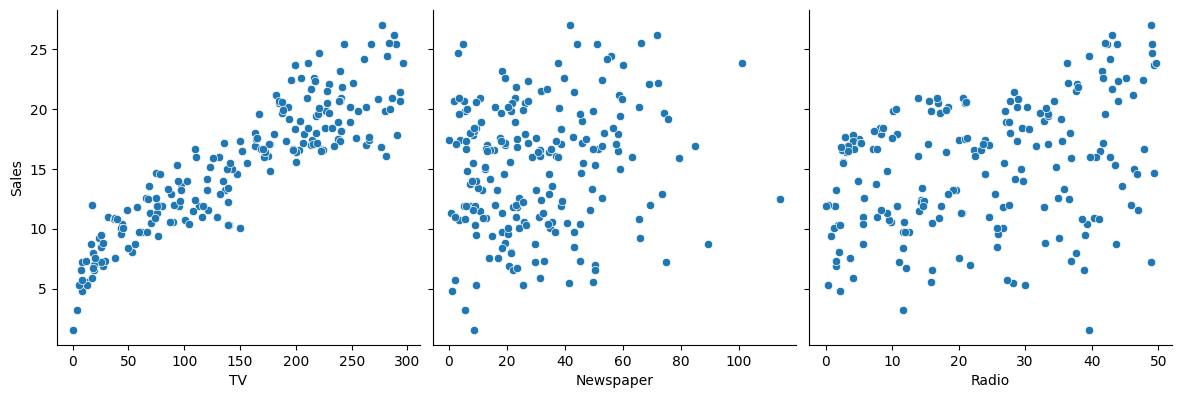

'aspect = 1 means the aspect ratio of the plot is 1:1, which means the width and height of each subplot will be equal. \nThis is useful for scatter plots to ensure that the data points are not distorted.'

In [22]:
sns.pairplot(advertising, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales',height=4, aspect=1, kind='scatter')
plt.show()

"""aspect = 1 means the aspect ratio of the plot is 1:1, which means the width and height of each subplot will be equal.
This is useful for scatter plots to ensure that the data points are not distorted."""

In [9]:
print(advertising.corr())

                 TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.901208
Radio      0.054809  1.000000   0.354104  0.349631
Newspaper  0.056648  0.354104   1.000000  0.157960
Sales      0.901208  0.349631   0.157960  1.000000


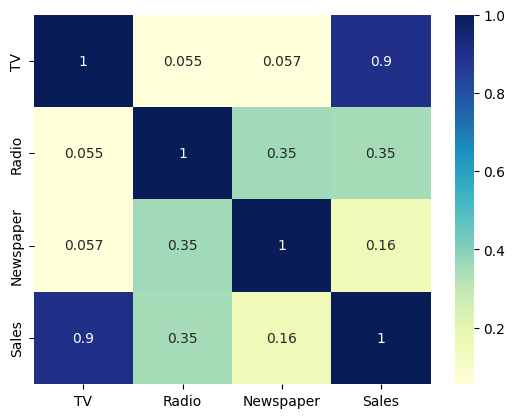

In [10]:
sns.heatmap(advertising.corr(), cmap="YlGnBu", annot = True)
plt.show()

As is visible from the pairplot and the heatmap, the variable `TV` seems to be most correlated with `Sales`. So let's go ahead and perform simple linear regression using `TV` as our feature variable.

---
## Step 3: Performing Simple Linear Regression

Equation of linear regression<br>
$y = w_0 + w_1x_1 + w_2x_2 + ... + w_nx_n$

-  $y$ is the response
-  $w_0$ is the intercept
-  $w_1$ is the coefficient for the first feature
-  $w_n$ is the coefficient for the nth feature<br>

In our case:

$y = w_0 + w_1 \times TV$

The $w_1$ values are called the model **coefficients** or **model parameters**.

---

We first assign the feature variable, `TV`, in this case, to the variable `X` and the response variable, `Sales`, to the variable `y`.

In [11]:
X = advertising['TV']
y = advertising['Sales']

### Linear Regression using `linear_model` in `sklearn`

We will use the `linear_model` library from `sklearn` to build the model. Since, we hae already performed a train-test split, we don't need to do it again.

There's one small step that we need to add, though. When there's only a single feature, we need to reshape the train set in order for the linear regression fit to be performed successfully.

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 42)


# y_train, y_test, X_train, X_test  = train_test_split(y, X, train_size = 0.7, test_size = 0.3, random_state = 42)

x_train and y_train ---> for training (x - input, y - output)

x_test and y_test ---> for testing (x-input, y - output)

In [13]:
X_train.shape   #2D --(n_samples, n_features)

(140,)

In [14]:
# Convert the Series to NumPy arrays and reshape
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)



# -1 → means: Automatically figure out the number of rows based on the data length
# 1 → means: "We want 1 column (feature)

In [15]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(140, 1)
(140,)
(60, 1)
(60,)


In [16]:
from sklearn.linear_model import LinearRegression

# Representing LinearRegression as lr(Creating LinearRegression Object)
lm = LinearRegression()

# Fit the model using lr.fit()
lm.fit(X_train, y_train)

LinearRegression()

In [17]:
print(lm.intercept_)
print(lm.coef_)

7.206554548173251
[0.05483488]


The equationwe get is the same as what we got before!

$ Sales = 7.206 + 0.054* TV $

In [18]:
y_pred = lm.predict(X_test)

In [ ]:
y_test

95     16.9
15     22.4
30     21.4
158     7.3
128    24.7
115    12.6
69     22.3
170     8.4
174    16.5
45     16.1
66     11.0
182     8.7
165    16.9
78      5.3
186    10.3
177    16.7
56      5.5
152    16.6
82     11.3
68     18.9
124    19.7
16     12.5
148    10.9
93     22.2
65     11.3
60      8.1
84     21.7
67     13.4
125    10.6
132     5.7
9      15.6
18     11.3
55     23.7
75      8.7
150    16.1
104    20.7
135    11.6
137    20.8
164    11.9
76      6.9
79     11.0
197    14.8
38     10.1
24      9.7
122    16.6
195     7.6
29     10.5
19     14.6
143    10.4
86     12.0
114    14.6
173    16.7
5       7.2
126     6.6
117     9.4
73     11.0
140    10.9
98     25.4
172     7.6
96     16.7
Name: Sales, dtype: float64

In [23]:
y_pred

array([16.16109107, 17.92129084, 23.26769201,  7.84812269, 19.28667945,
       11.32465432, 19.09475735,  9.94829874, 19.4018327 , 16.8081427 ,
        8.93385339, 10.28827502, 20.0653348 ,  7.50266292, 14.85602084,
       16.53945177,  7.6068492 , 18.04192759, 11.3356213 , 20.22435596,
       19.79116038, 10.92435967,  9.29028013, 20.96462689, 10.99016153,
       10.14022083, 18.91380224, 14.84505386, 11.98815642,  7.66716757,
       18.16256433, 11.00112851, 18.11321294,  8.13326408, 22.59870643,
       20.26822387,  9.85507944, 22.21486224, 13.63320293,  8.71451385,
       13.56740107, 16.91232898,  9.56993804, 10.62276781, 19.48956852,
        9.30124711, 11.07789734, 15.28373293, 12.94228339, 11.39045618,
       11.49464246, 16.44074898,  7.68361804,  7.63426664, 11.39593967,
       14.30218851, 11.23143502, 23.09222038,  8.28131827, 18.04192759])

In [ ]:
# Step 9: Evaluate the model

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

print("R2 Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))

R2 Score: 0.814855389208679
Mean Squared Error: 5.179525402166653
Mean Absolute Error: 1.8069123776641516


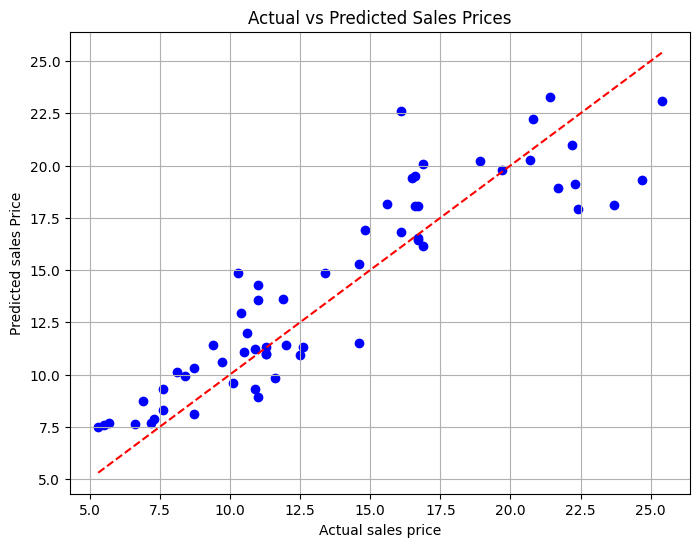

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Perfect prediction line   (10,50),(10,15)
plt.xlabel("Actual sales price")
plt.ylabel("Predicted sales Price")
plt.title("Actual vs Predicted Sales Prices")
plt.grid(True)
plt.show()
